# Data Preprocessing & Feature Engineering for Machine Learning

## Data Import and first Inspection

1. __Import__ the housing dataset (housing.csv) and __inspect__!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

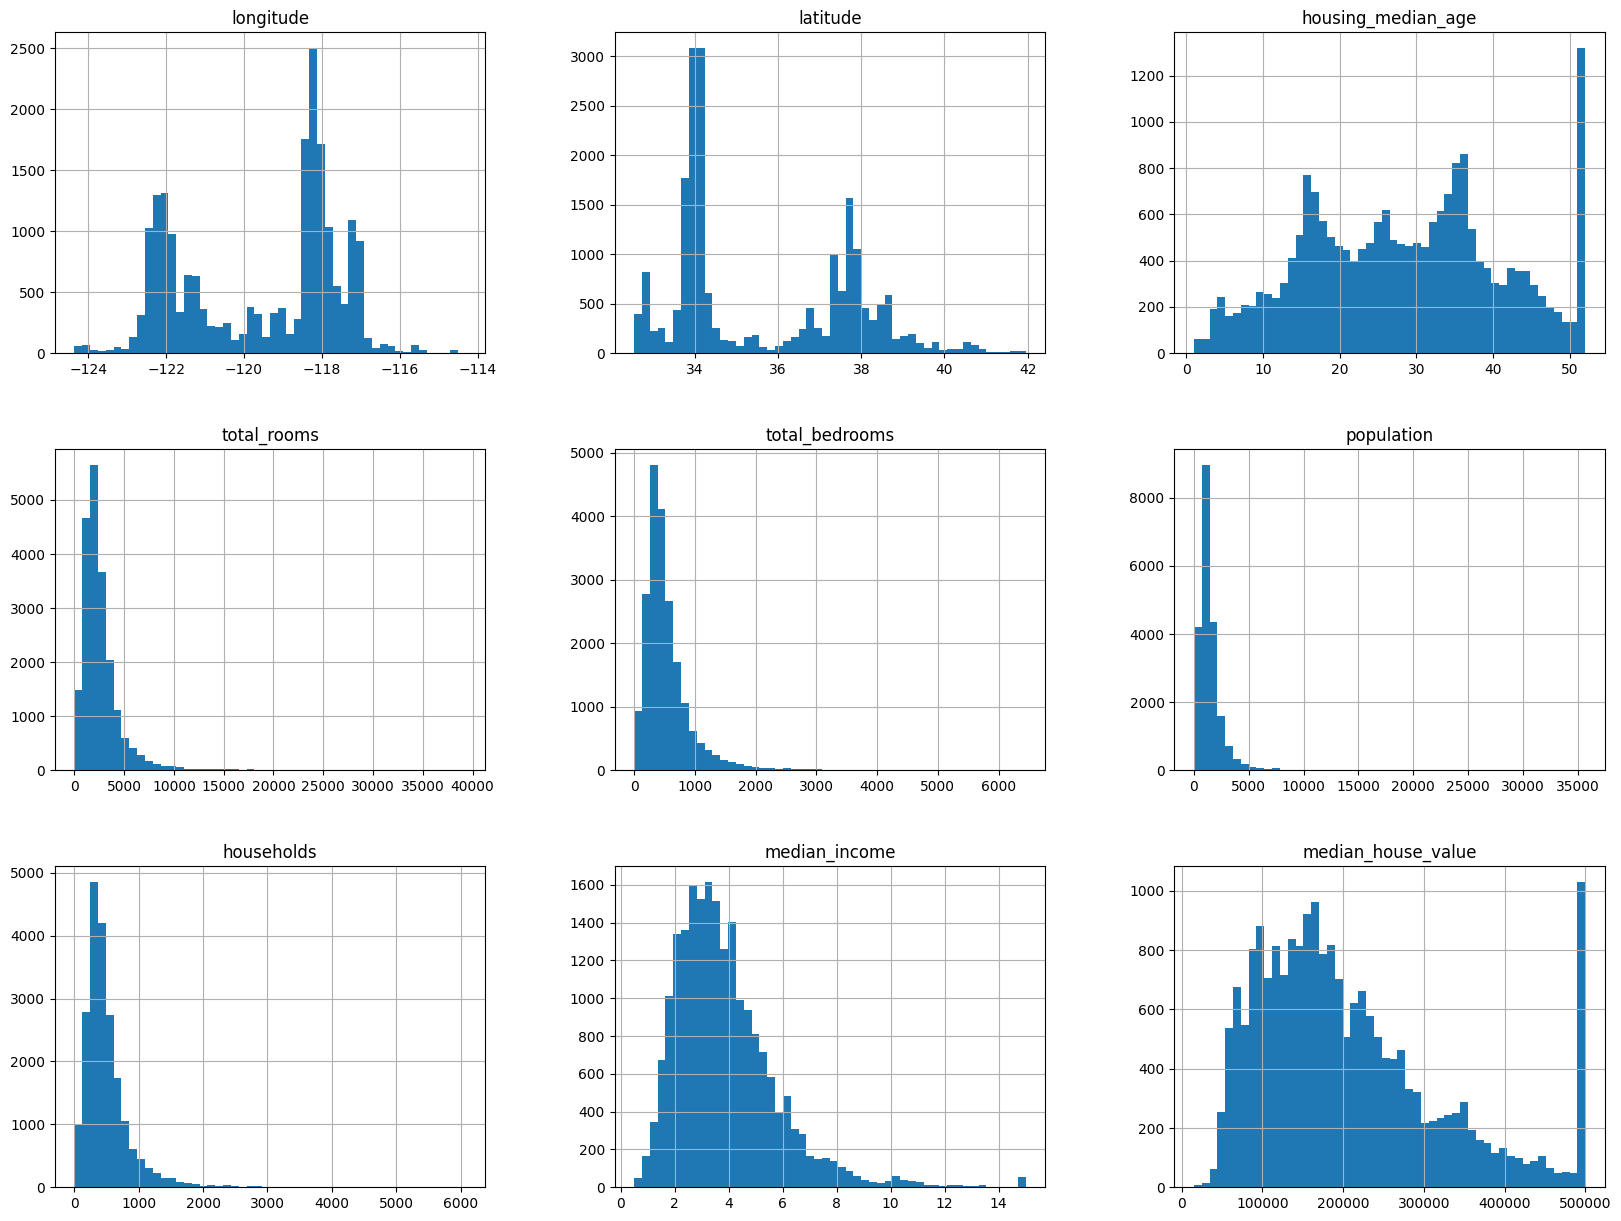

In [4]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

## Data Cleaning and Creating additional Features

2. __Drop__ all rows with (at least one) missing value(s).

In [5]:
mask1 = df.isnull().sum(axis = 1) >= 1
mask1

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [6]:
df.loc[mask1]
# missing values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.00,1256.00,NaN,570.00,218.00,4.38,161900.00,NEAR BAY
341,-122.17,37.75,38.00,992.00,NaN,732.00,259.00,1.62,85100.00,NEAR BAY
538,-122.28,37.78,29.00,5154.00,NaN,3741.00,1273.00,2.58,173400.00,NEAR BAY
563,-122.24,37.75,45.00,891.00,NaN,384.00,146.00,4.95,247100.00,NEAR BAY
696,-122.10,37.69,41.00,746.00,NaN,387.00,161.00,3.91,178400.00,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.00,3620.00,NaN,3171.00,779.00,3.34,220500.00,NEAR OCEAN
20268,-119.18,34.19,19.00,2393.00,NaN,1938.00,762.00,1.70,167400.00,NEAR OCEAN
20372,-118.88,34.17,15.00,4260.00,NaN,1701.00,669.00,5.10,410700.00,<1H OCEAN
20460,-118.75,34.29,17.00,5512.00,NaN,2734.00,814.00,6.61,258100.00,<1H OCEAN


In [7]:
df = df.loc[~mask1].copy()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND


3. __Add__ the additional Feature __"rooms_per_household"__ (should be self-explanatory)

In [8]:
df["rooms_per_household"] = df.total_rooms/df.households

In [9]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33


4. __Add__ the additional Feature __"population_per_household"__ (should be self-explanatory)

In [10]:
df["population_per_household"] = df.population/df.households

In [11]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,2.56
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.11
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,2.80
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,2.55
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,2.56
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.12
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.33
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.12


5. __Add__ the additional Feature __"bedrooms_per_household"__ (should be self-explanatory)

In [12]:
df["bedrooms_per_household"] = df.total_bedrooms/df.households

In [13]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,2.56,1.02
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.11,0.97
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,2.80,1.07
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,2.55,1.07
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.18,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,2.56,1.13
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.12,1.32
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.33,1.12
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.12,1.17


In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_household
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,-119.57,35.63,28.63,2636.50,537.87,1424.95,499.43,3.87,206864.41,5.43,3.07,1.10
std,2.00,2.14,12.59,2185.27,421.39,1133.21,382.30,1.90,115435.67,2.48,10.44,0.48
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00,0.85,0.69,0.33
25%,-121.80,33.93,18.00,1450.00,296.00,787.00,280.00,2.56,119500.00,4.44,2.43,1.01
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.54,179700.00,5.23,2.82,1.05
75%,-118.01,37.72,37.00,3143.00,647.00,1722.00,604.00,4.74,264700.00,6.05,3.28,1.10
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00,141.91,1243.33,34.07


## Which Factors influence House Prices?

6. __Calculate__ the __Correlation__ between "median_house_value" and all features. Which factors seems to influence house prices/values?

In [15]:
df_grade = df.loc[:, ["median_house_value", "longitude", "latitude" ,"housing_median_age", "total_rooms", "population", "households", "median_income", "rooms_per_household", "population_per_household", "bedrooms_per_household"]].corr().round(2)
df_grade

,median_house_value,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
median_house_value,1.00,-0.05,-0.14,0.11,0.13,-0.03,0.06,0.69,0.15,-0.02,-0.05
longitude,-0.05,1.00,-0.92,-0.11,0.05,0.10,0.06,-0.02,-0.03,0.00,0.01
latitude,-0.14,-0.92,1.00,0.01,-0.04,-0.11,-0.07,-0.08,0.11,0.00,0.07
housing_median_age,0.11,-0.11,0.01,1.00,-0.36,-0.30,-0.30,-0.12,-0.15,0.01,-0.08
total_rooms,0.13,0.05,-0.04,-0.36,1.00,0.86,0.92,0.20,0.13,-0.02,0.03
population,-0.03,0.10,-0.11,-0.30,0.86,1.00,0.91,0.01,-0.07,0.07,-0.07
households,0.06,0.06,-0.07,-0.30,0.92,0.91,1.00,0.01,-0.08,-0.03,-0.06
median_income,0.69,-0.02,-0.08,-0.12,0.20,0.01,0.01,1.00,0.33,0.02,-0.06
rooms_per_household,0.15,-0.03,0.11,-0.15,0.13,-0.07,-0.08,0.33,1.00,-0.00,0.85
population_per_household,-0.02,0.00,0.00,0.01,-0.02,0.07,-0.03,0.02,-0.00,1.00,-0.01


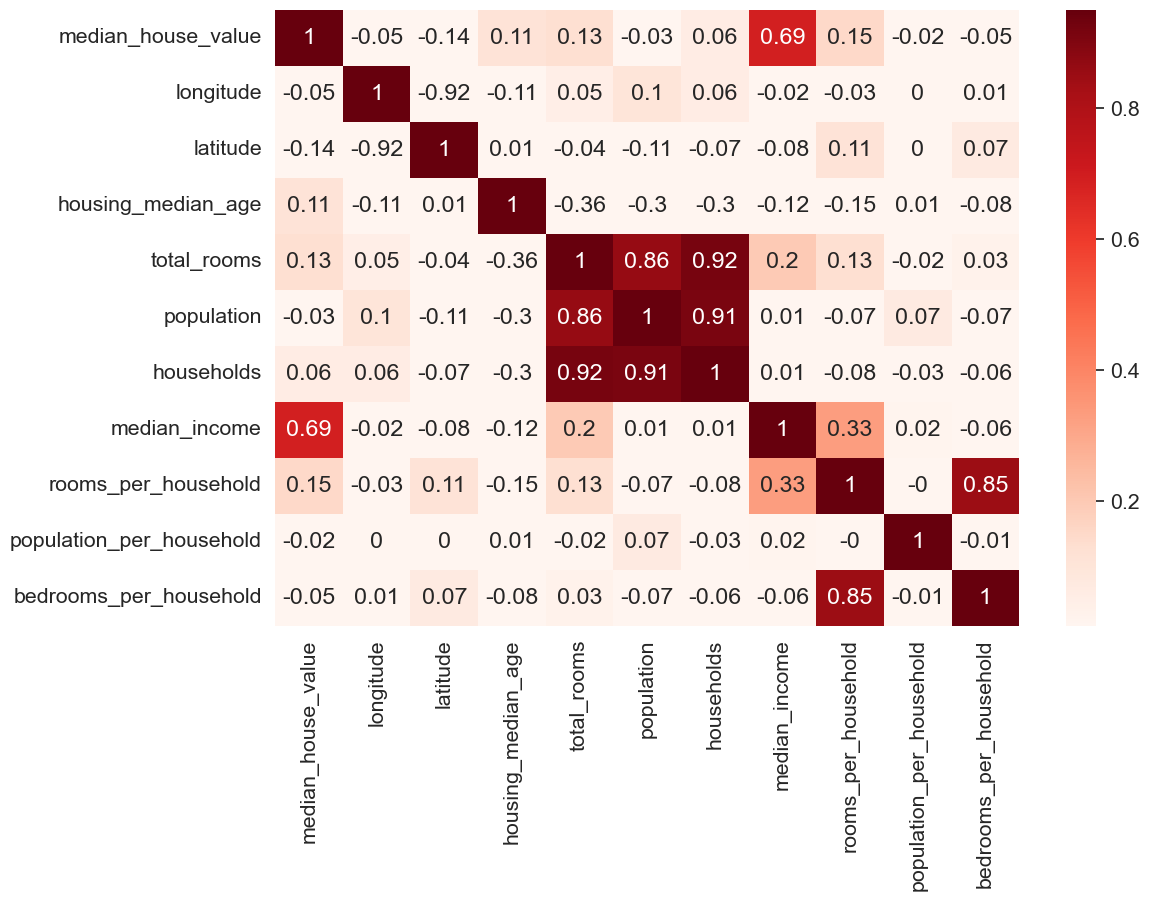

In [16]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(df_grade, annot= True, cmap = "Reds", vmax = 0.95, vmin = 0.01) #correlation matrix
plt.show()

7. __Create__ a Seaborn Regression plot (__jointplot__) with income on the x-axis and house value on the y-axis.

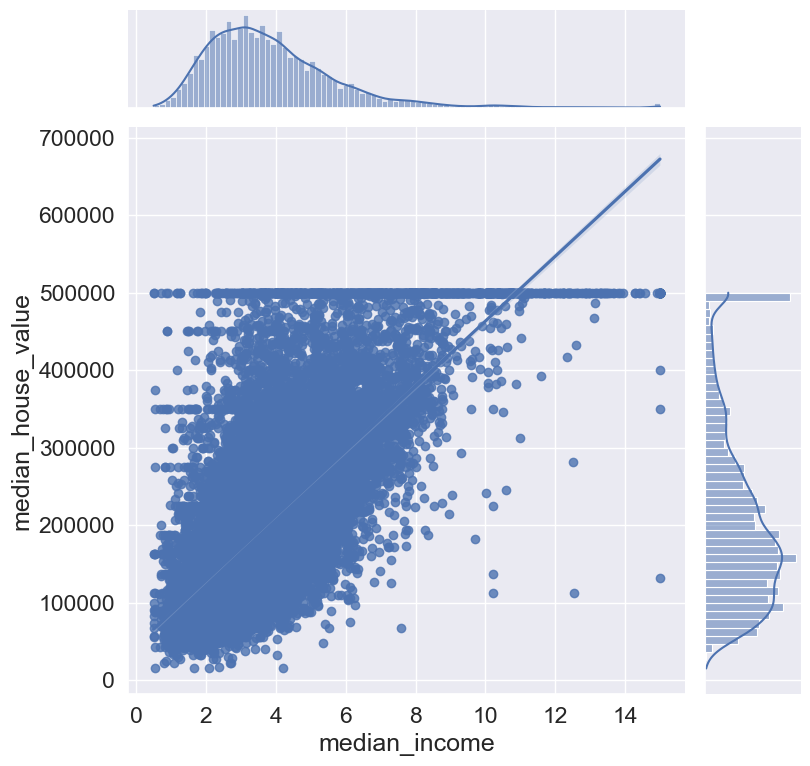

In [17]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", height = 8, kind = "reg")
plt.show()

8. __Create__ the __scatterplot__ (df.plot(kind = "scatter")) with
- longitude on x-axis
- latitude on y-axis
- size (s) of data points determined by population
- color (c) of data points determined by median_house_value

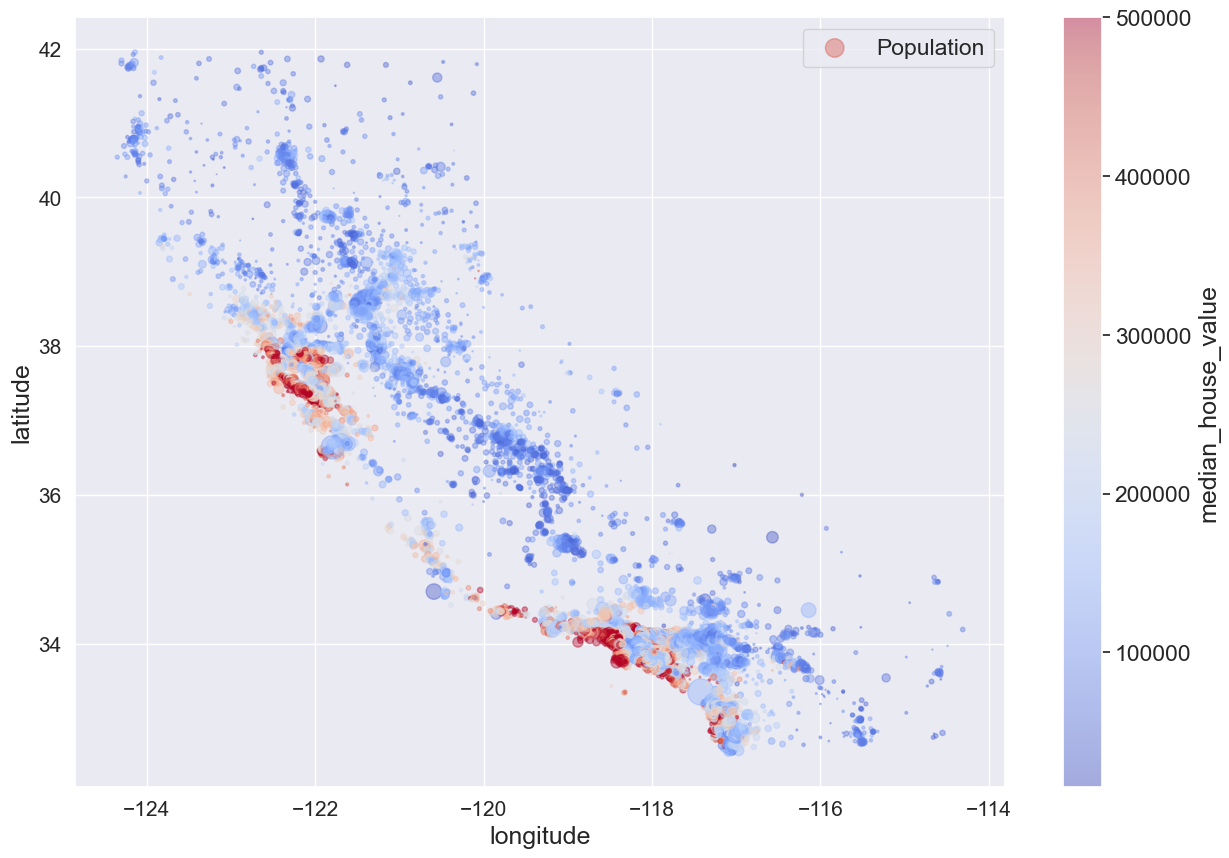

In [18]:
df.plot(kind = "scatter", 
        x = "longitude", 
        y = "latitude", 
        s = df.population/100, 
        label = "Population", 
        c = "median_house_value", 
        cmap = "coolwarm", 
        colorbar = True,
        fontsize = 15,
        alpha = 0.4,
        figsize = (15, 10))
plt.show()

9. Let´s __add the map__ of California saved in __california.png__.

Hint: You can load and display the image california.png with the right latitude/longitude as follows:

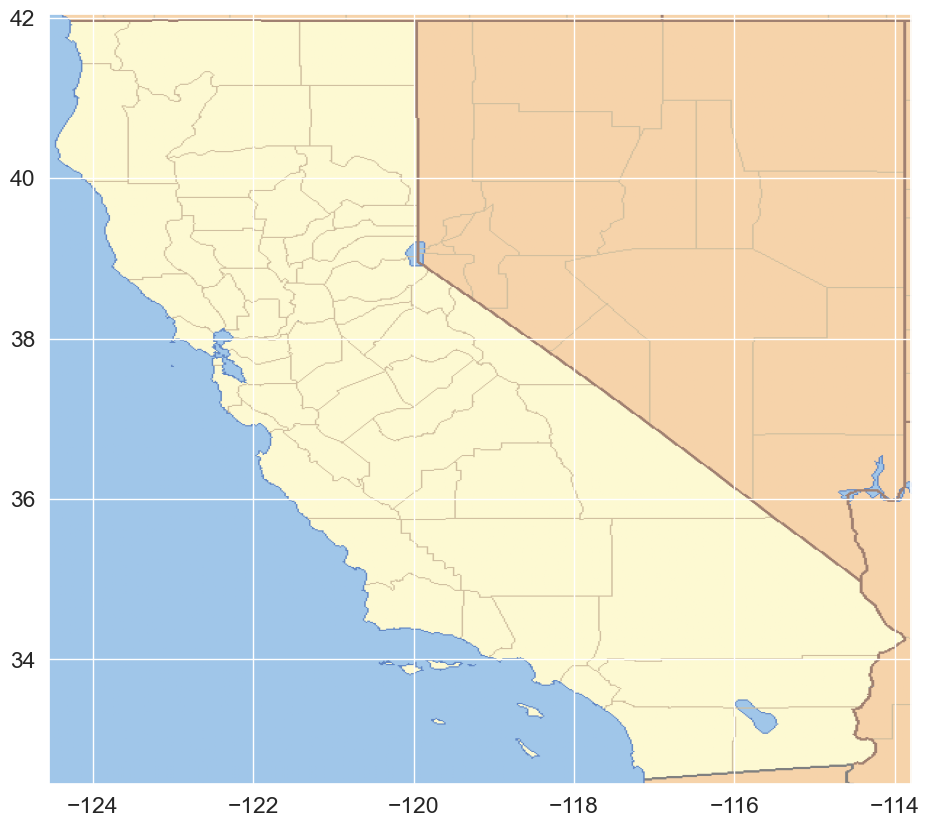

In [19]:
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

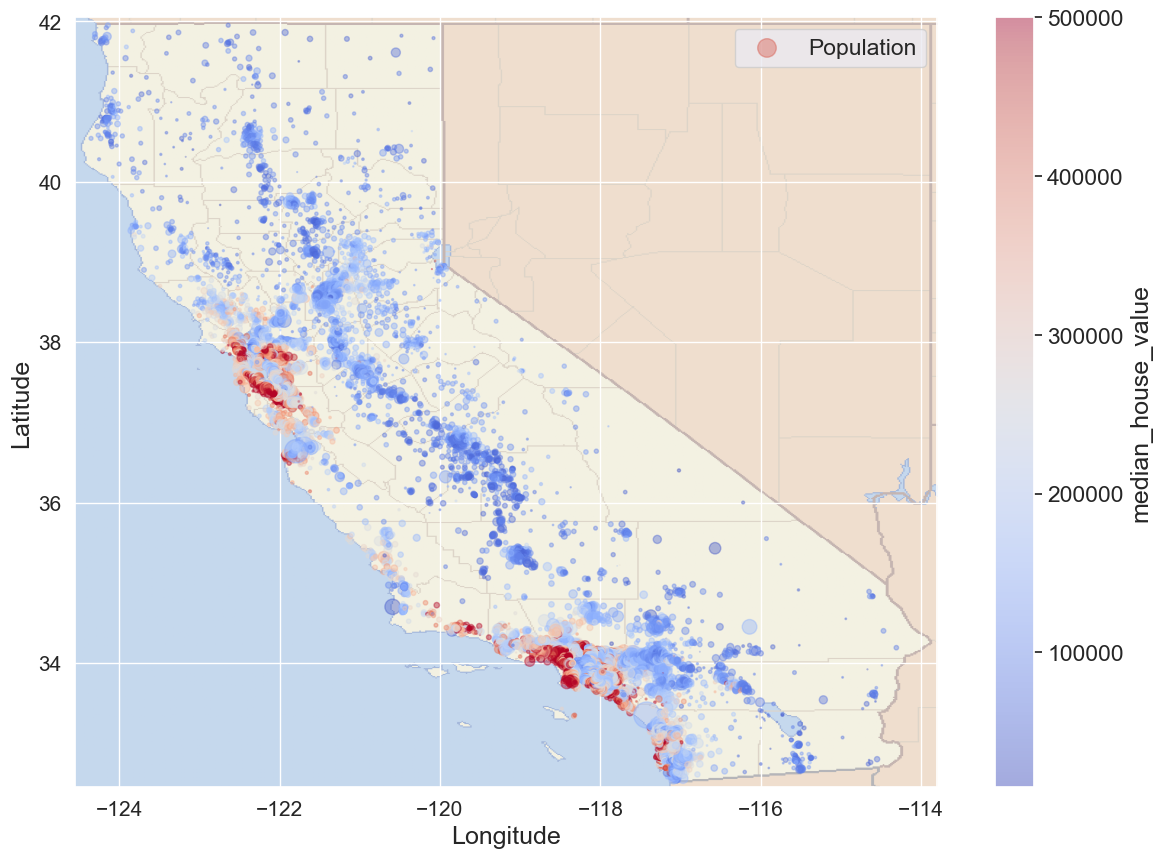

In [20]:
df.plot(kind = "scatter", 
        x = "longitude", 
        y = "latitude", 
        s = df.population/100, 
        label = "Population", 
        c = "median_house_value", 
        cmap = "coolwarm", 
        colorbar = True,
        fontsize = 15,
        alpha = 0.4,
        figsize = (15, 10))

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], 
          alpha = 0.5, cmap = plt.get_cmap("jet"))
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.legend()
plt.show()

In [21]:
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [22]:
prox[1]

'<1H OCEAN'

In [23]:
df_loc = df[df.ocean_proximity == prox[1]].copy()
# Near Ocean

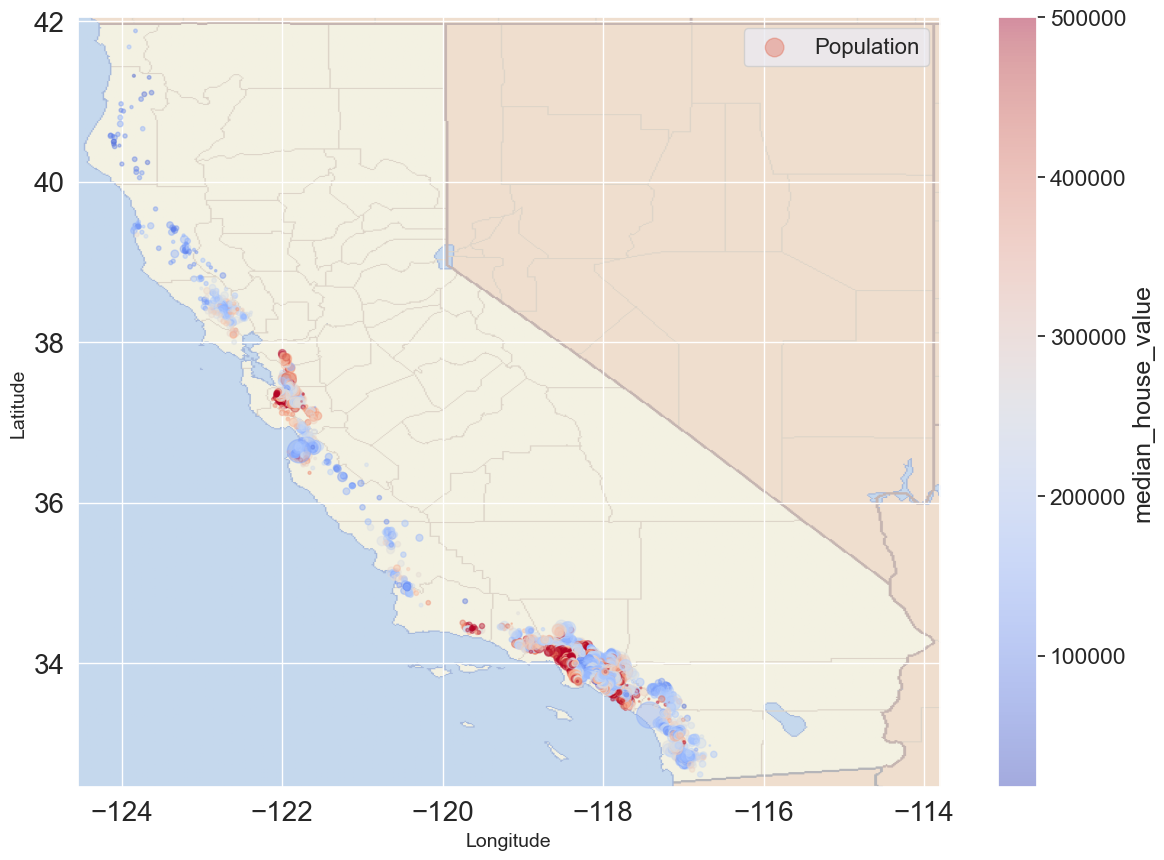

In [24]:
df_loc.plot(kind="scatter", x="longitude", y="latitude",
                       s=df_loc['population']/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

## Advanced Explanatory Data Analyis with Seaborn

10. __Add__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [25]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,2.56,1.02
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.11,0.97
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,2.80,1.07
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,2.55,1.07
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.18,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,2.56,1.13
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.12,1.32
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.33,1.12
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.12,1.17


In [26]:
df.median_income

0       8.33
1       8.30
2       7.26
3       5.64
4       3.85
        ... 
20635   1.56
20636   2.56
20637   1.70
20638   1.87
20639   2.39
Name: median_income, Length: 20433, dtype: float64

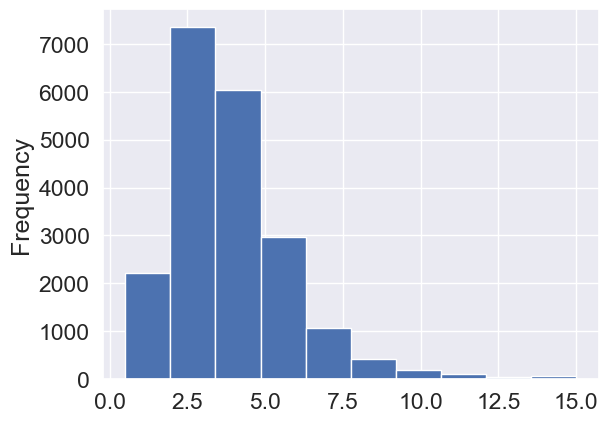

In [27]:
df.median_income.plot(kind = "hist")
plt.show()

In [28]:
labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"]

In [29]:
pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1], labels = labels).value_counts()

Low              5109
Above_Average    5109
Below_Average    5108
High             4085
Very High        1022
Name: median_income, dtype: int64

In [30]:
df["income_cat"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1], labels = labels)

In [31]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household,income_cat
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,2.56,1.02,Very High
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.11,0.97,Very High
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,2.80,1.07,High
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,2.55,1.07,High
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.18,1.08,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,2.56,1.13,Low
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.12,1.32,Low
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.33,1.12,Low
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.12,1.17,Low


In [32]:
df.income_cat.value_counts(normalize = True)

Low             0.25
Above_Average   0.25
Below_Average   0.25
High            0.20
Very High       0.05
Name: income_cat, dtype: float64

11. __Create__ (and interpret) the Seaborn __Countplots__ between categories.

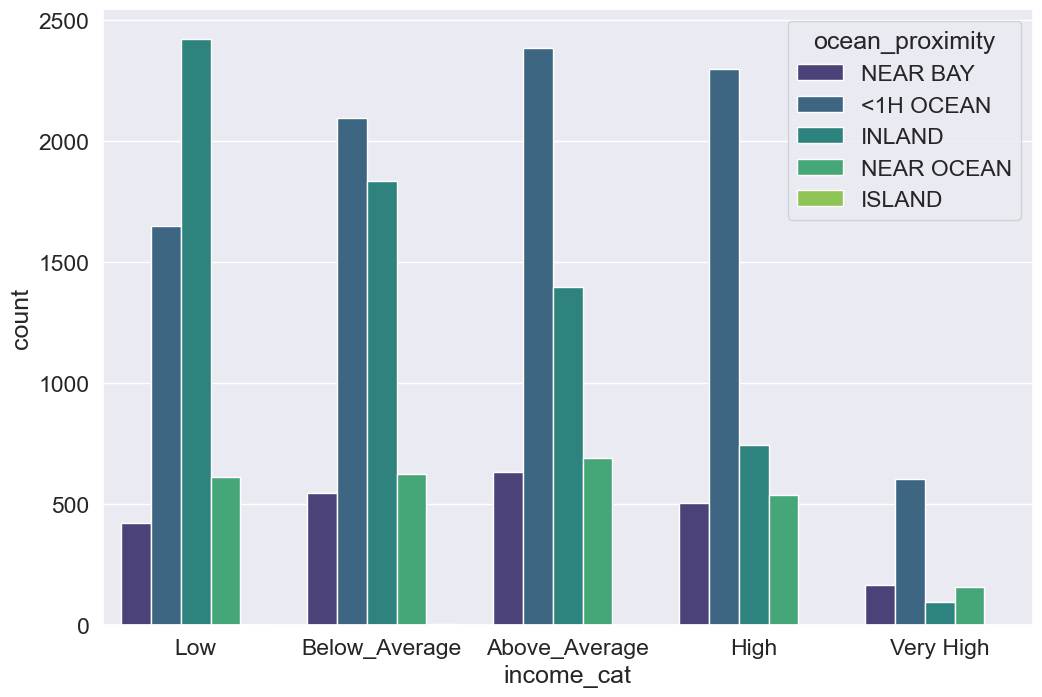

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity",  palette= "viridis") #hue: column with categorical data
plt.show()

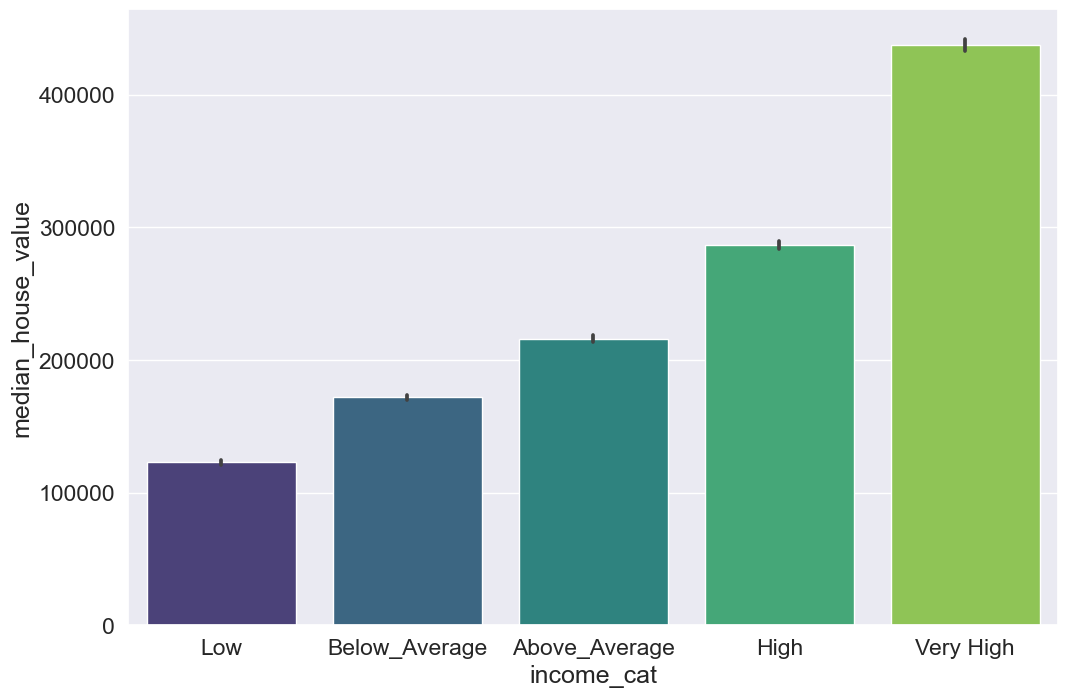

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(data = df, x = "income_cat", y = "median_house_value", dodge = True, palette= "viridis")
plt.show()

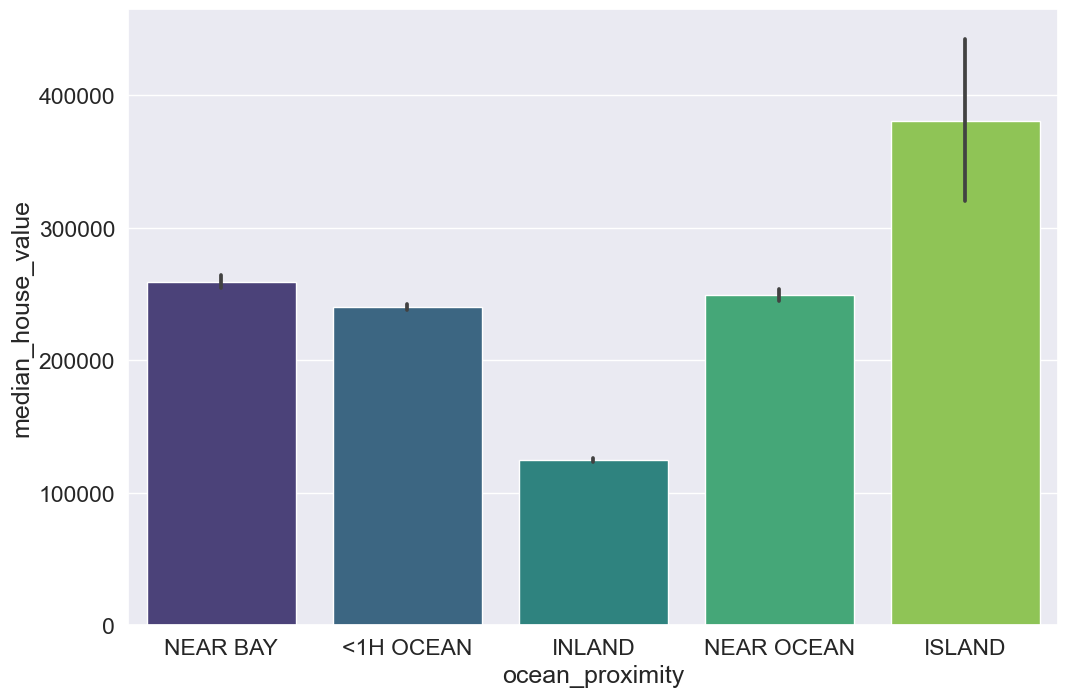

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True, palette= "viridis")
plt.show()

12. __Create__ (and interpret) the Seaborn __Heatmap__ with mean house values for all combinations of income_cat & ocean_proximity:

In [36]:
df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean()

income_cat     ocean_proximity
Low            <1H OCEAN         161337.08
               INLAND             84820.63
               ISLAND            450000.00
               NEAR BAY          155122.05
               NEAR OCEAN        148027.83
Below_Average  <1H OCEAN         197236.01
               INLAND            115124.09
               ISLAND            363050.00
               NEAR BAY          220196.18
               NEAR OCEAN        208665.19
Above_Average  <1H OCEAN         232278.36
               INLAND            147846.89
               ISLAND                  NaN
               NEAR BAY          261965.25
               NEAR OCEAN        255293.81
High           <1H OCEAN         292208.77
               INLAND            208095.57
               ISLAND                  NaN
               NEAR BAY          322566.03
               NEAR OCEAN        337446.23
Very High      <1H OCEAN         439784.24
               INLAND            347571.74
               ISLAND  

In [37]:
df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack()

ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,,
Low,161337.08,84820.63,450000.00,155122.05,148027.83
Below_Average,197236.01,115124.09,363050.00,220196.18,208665.19
Above_Average,232278.36,147846.89,NaN,261965.25,255293.81
High,292208.77,208095.57,NaN,322566.03,337446.23
Very High,439784.24,347571.74,NaN,451015.08,468739.72


In [38]:
matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])
matrix

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337.08,84820.63,155122.05,148027.83
Below_Average,197236.01,115124.09,220196.18,208665.19
Above_Average,232278.36,147846.89,261965.25,255293.81
High,292208.77,208095.57,322566.03,337446.23
Very High,439784.24,347571.74,451015.08,468739.72


In [39]:
matrix.astype("int")

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337,84820,155122,148027
Below_Average,197236,115124,220196,208665
Above_Average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very High,439784,347571,451015,468739


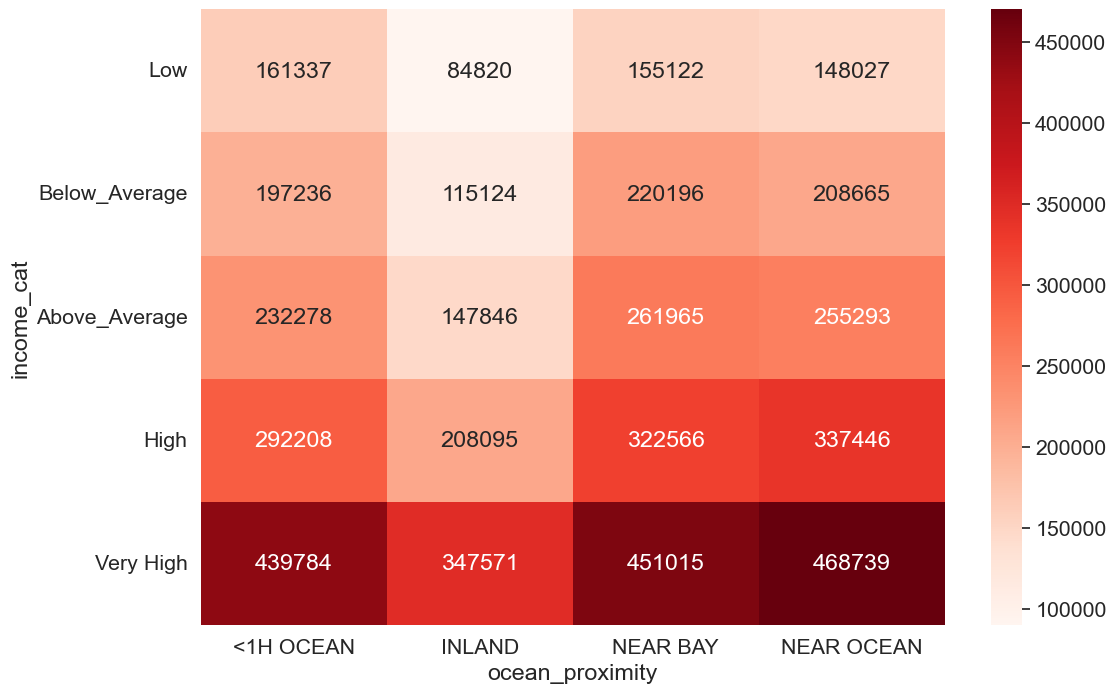

In [40]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), annot= True, fmt = "d", cmap = "Reds", vmin = 90000, vmax = 470000)
plt.show()

# Machine Learning - Predicting House Values

Based on the Explanatory Data Analysis, <br>
- select an appropriate ML Model (e.g. Linear Regression or RandomForest Regression)
- split into Train and Test Set
- prepare/engineer Features
- Fit the Model (Train Set)
- Test the Model (Test Set)

In [41]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household,income_cat
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,2.56,1.02,Very High
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.11,0.97,Very High
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,2.80,1.07,High
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,2.55,1.07,High
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.18,1.08,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,2.56,1.13,Low
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.12,1.32,Low
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.33,1.12,Low
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.12,1.17,Low


In [42]:
label = df.median_house_value.copy()
label

0       452600.00
1       358500.00
2       352100.00
3       341300.00
4       342200.00
           ...   
20635    78100.00
20636    77100.00
20637    92300.00
20638    84700.00
20639    89400.00
Name: median_house_value, Length: 20433, dtype: float64

In [43]:
features = df.drop(columns = ["median_house_value"])
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household,income_cat
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,NEAR BAY,6.98,2.56,1.02,Very High
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,NEAR BAY,6.24,2.11,0.97,Very High
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,NEAR BAY,8.29,2.80,1.07,High
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,NEAR BAY,5.82,2.55,1.07,High
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,NEAR BAY,6.28,2.18,1.08,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,INLAND,5.05,2.56,1.13,Low
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,INLAND,6.11,3.12,1.32,Low
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,INLAND,5.21,2.33,1.12,Low
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,INLAND,5.33,2.12,1.17,Low


In [44]:
features.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [45]:
dummies = pd.get_dummies(features.ocean_proximity)
dummies
# Create dummy variables

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [46]:
feat1 = features.select_dtypes("float")
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,6.98,2.56,1.02
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,6.24,2.11,0.97
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,8.29,2.80,1.07
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,5.82,2.55,1.07
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,6.28,2.18,1.08
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,5.05,2.56,1.13
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,6.11,3.12,1.32
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,5.21,2.33,1.12
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,5.33,2.12,1.17


In [47]:
features = pd.concat([feat1, dummies], axis = 1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,6.98,2.56,1.02,0,0,0,1,0
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,6.24,2.11,0.97,0,0,0,1,0
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,8.29,2.80,1.07,0,0,0,1,0
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,5.82,2.55,1.07,0,0,0,1,0
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,6.28,2.18,1.08,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,5.05,2.56,1.13,0,1,0,0,0
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,6.11,3.12,1.32,0,1,0,0,0
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,5.21,2.33,1.12,0,1,0,0,0
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,5.33,2.12,1.17,0,1,0,0,0


In [48]:
features.iloc[:,:].values

array([[-122.23,   37.88,   41.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.22,   37.86,   21.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.24,   37.85,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-121.22,   39.43,   17.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.32,   39.43,   18.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.24,   39.37,   16.  , ...,    0.  ,    0.  ,    0.  ]])

In [49]:
label.values

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [50]:
X = features.iloc[:,:].values
y = label.values

## Splitting the dataset into the Training set and Test set

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [52]:
print(X_train)

[[-118.25   34.     36.   ...    0.      0.      0.  ]
 [-118.37   34.16    6.   ...    0.      0.      0.  ]
 [-118.31   34.07   26.   ...    0.      0.      0.  ]
 ...
 [-122.26   38.16   23.   ...    0.      1.      0.  ]
 [-117.86   33.74    9.   ...    0.      0.      0.  ]
 [-115.49   32.67   24.   ...    0.      0.      0.  ]]


In [53]:
print(X_train[0, :-5])

[-118.25         34.           36.         1033.          267.
 1112.          229.            1.7237        4.51091703    4.8558952
    1.16593886]


In [54]:
print(X_train[0, -5:])

[1. 0. 0. 0. 0.]


In [55]:
print(y_train)

[105800. 250000. 166700. ... 130400. 165300.  73100.]


In [56]:
print(X_test)

[[-117.08   32.7    37.   ...    0.      0.      1.  ]
 [-117.91   34.11   20.   ...    0.      0.      0.  ]
 [-117.1    32.75   11.   ...    0.      0.      1.  ]
 ...
 [-118.38   34.19   37.   ...    0.      0.      0.  ]
 [-118.29   34.09   39.   ...    0.      0.      0.  ]
 [-118.13   34.16   52.   ...    0.      0.      0.  ]]


In [57]:
print(y_test)

[ 98900. 153000.  91300. ... 176300. 262500. 227900.]


### Feature Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train[:, :-5] = sc.fit_transform(X_train[:, :-5]) #train x and fit the model using transform 
X_test[:, :-5] = sc.transform(X_test[:, :-5] ) 

In [59]:
X_train

array([[0.60756972, 0.15565032, 0.68627451, ..., 0.        , 0.        ,
        0.        ],
       [0.59561753, 0.17270789, 0.09803922, ..., 0.        , 0.        ,
        0.        ],
       [0.60159363, 0.16311301, 0.49019608, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.20816733, 0.59914712, 0.43137255, ..., 0.        , 1.        ,
        0.        ],
       [0.64641434, 0.12793177, 0.15686275, ..., 0.        , 0.        ,
        0.        ],
       [0.88247012, 0.01385928, 0.45098039, ..., 0.        , 0.        ,
        0.        ]])

In [60]:
print(X_train[0])

[0.60756972 0.15565032 0.68627451 0.02622209 0.04127871 0.03102839
 0.03749383 0.08439884 0.02568446 0.0033506  0.02468198 1.
 0.         0.         0.         0.        ]


## Training the Multiple Linear Regression model on the Training set

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #make 'regressor' using LinearRegression
regressor.fit(X_train, y_train) #fit 'regressor' to X_train and y_train

LinearRegression()

### Performance evaluation

#### Training set

##### R-squared

In [62]:
regressor.score(X_train, y_train)

0.6477736823699254

##### MSE, RMSE

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
y_pred = regressor.predict(X_train)
y_pred

array([131968., 264832., 238720., ..., 208000., 149888.,  29952.])

In [65]:
regressor_mse = mean_squared_error(y_train, y_pred)
regressor_rmse = np.sqrt(regressor_mse)
regressor_rmse

68472.46275110109

#### Test set

##### R-squared

In [66]:
regressor.score(X_test, y_test)

0.6491596377417063

##### MSE, RMSE

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
y_pred = regressor.predict(X_test)
y_pred

array([187648., 176128., 122624., ..., 157312., 152448., 223744.])

In [69]:
regressor_mse = mean_squared_error(y_test, y_pred)
regressor_rmse = np.sqrt(regressor_mse)
regressor_rmse

68474.8225476423

##### MAE

In [70]:
comparison = pd.DataFrame(data = {"True_V": y_test, "Pred":y_pred})
comparison

,True_V,Pred
0,98900.00,187648.00
1,153000.00,176128.00
2,91300.00,122624.00
3,345200.00,382976.00
4,344100.00,343168.00
...,...,...
5104,241100.00,260608.00
5105,110900.00,85120.00
5106,176300.00,157312.00
5107,262500.00,152448.00


In [71]:
ae = comparison.True_V.sub(comparison.Pred).abs()
ae

0       88748.00
1       23128.00
2       31324.00
3       37776.00
4         932.00
          ...   
5104    19508.00
5105    25780.00
5106    18988.00
5107   110052.00
5108     4156.00
Length: 5109, dtype: float64

In [72]:
mae = ae.mean()
mae

49911.748091603054

## Training the Random Forest model on the Training set

In [73]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state = 42, 
                                   n_estimators = 500,
                                   max_features= "sqrt", 
                                   max_depth= 75, 
                                   min_samples_split=2).fit(X_train, y_train)

In [74]:
forest_reg

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

### Performance evaluation

#### Training set

##### R-squared

In [75]:
forest_reg.score(X_train, y_train)

0.97592530571057

##### MSE, RMSE

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
y_pred = forest_reg.predict(X_train)
y_pred

array([106145.8  , 246869.002, 205590.2  , ..., 140681.   , 160585.6  ,
        71613.   ])

In [78]:
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

17901.335734073262

#### Test set

##### R-squared

In [79]:
forest_reg.score(X_test, y_test)

0.8224126704416698

In [80]:
y_pred = forest_reg.predict(X_test)
y_pred

array([124358.8  , 180756.   , 116601.   , ..., 167800.8  , 169383.006,
       196342.606])

##### MSE, RMSE

In [81]:
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

48717.17856798383

##### MAE

In [82]:
comparison = pd.DataFrame(data = {"True_V": y_test, "Pred":y_pred})
comparison

,True_V,Pred
0,98900.00,124358.80
1,153000.00,180756.00
2,91300.00,116601.00
3,345200.00,353779.38
4,344100.00,337208.63
...,...,...
5104,241100.00,276581.04
5105,110900.00,98279.00
5106,176300.00,167800.80
5107,262500.00,169383.01


In [83]:
ae = comparison.True_V.sub(comparison.Pred).abs()
ae

0      25458.80
1      27756.00
2      25301.00
3       8579.38
4       6891.37
         ...   
5104   35481.04
5105   12621.00
5106    8499.20
5107   93116.99
5108   31557.39
Length: 5109, dtype: float64

In [84]:
mae = ae.mean()
mae

32562.601190448233

### Feature importance of random forest model

In [85]:
forest_reg.feature_importances_

array([9.10218110e-02, 8.33799010e-02, 4.12116377e-02, 2.56136198e-02,
       2.05523369e-02, 2.46009510e-02, 2.01580644e-02, 3.03950653e-01,
       9.39604857e-02, 9.77043795e-02, 2.75706876e-02, 2.09077058e-02,
       1.33484449e-01, 2.33591852e-04, 6.37306002e-03, 9.27666555e-03])

In [86]:
features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'population_per_household',
       'bedrooms_per_household', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [87]:
feature_imp = pd.Series(data = forest_reg.feature_importances_,
          index = features.columns).sort_values(ascending = False)
feature_imp

median_income              0.30
INLAND                     0.13
population_per_household   0.10
rooms_per_household        0.09
longitude                  0.09
latitude                   0.08
housing_median_age         0.04
bedrooms_per_household     0.03
total_rooms                0.03
population                 0.02
<1H OCEAN                  0.02
total_bedrooms             0.02
households                 0.02
NEAR OCEAN                 0.01
NEAR BAY                   0.01
ISLAND                     0.00
dtype: float64

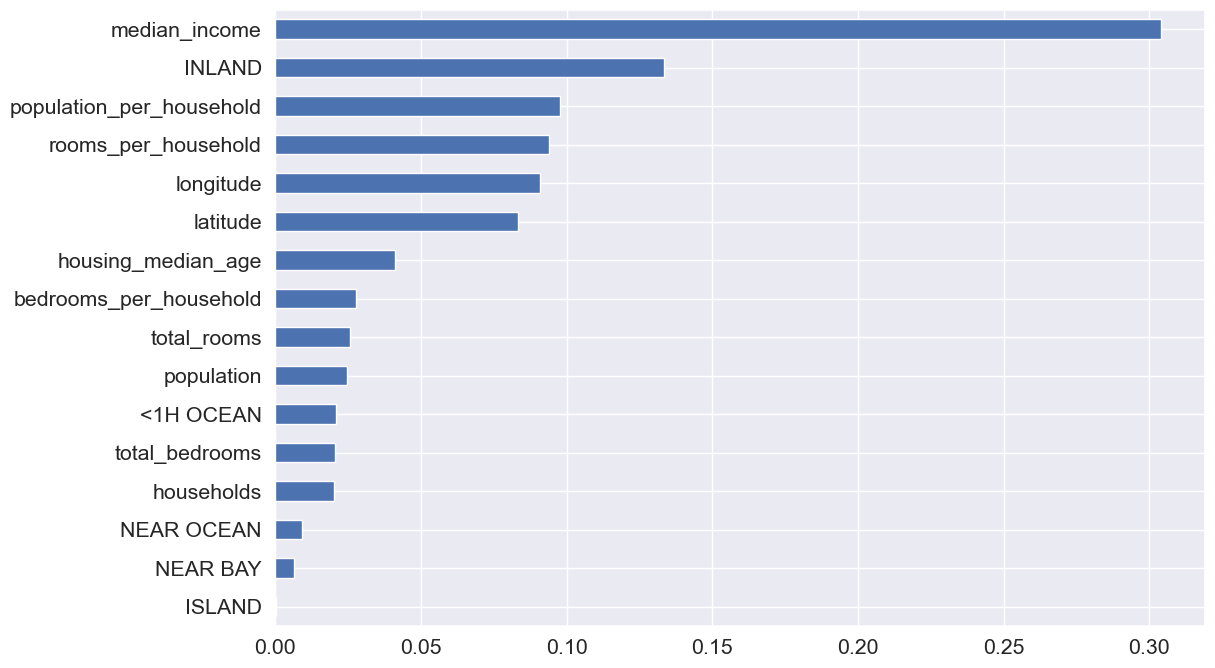

In [88]:
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()